# CBC Data Exploration
### Purpose
In this notebook I will create an example header and show how to structure the notebooks for easy readaility and documentation. 

In short, we are trying to follow the conventions of Cookie Cutter Data Science: https://drivendata.github.io/cookiecutter-data-science/ 


### Author: 
Hamza
### Date: 
2020-06-04
### Update Date: 
tbd

### Inputs 
cbc_effort_weather_1900-2018.txt - Tab seperated file of Christmas Bird Count events going back to 1900. Each row represents a single count in a given year. Data Dictonary can be found here: http://www.audubon.org/sites/default/files/documents/cbc_report_field_definitions_2013.pdf

### Output Artifcats
Plots and properties of the data

## Steps or Proceedures in the notebook 
 - load data from the Audubon Society
 - make some pictures
 - look at the pictures


## Where the Data will Be Saved 
n/a

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PATH_TO_RAW_CBC_DATA = "../data/Cloud_Data/cbc_effort_weather_1900-2018.txt"

In [3]:
raw_data = pd.read_csv(PATH_TO_RAW_CBC_DATA, encoding = "ISO-8859-1", sep="\t")

## typing

In [4]:
raw_data.dtypes

circle_name            object
country_state          object
lat                   float64
lon                   float64
count_year              int64
count_date             object
n_field_counters      float64
n_feeder_counters     float64
min_field_parties     float64
max_field_parties     float64
field_hours           float64
feeder_hours          float64
nocturnal_hours       float64
field_distance        float64
nocturnal_distance    float64
distance_units         object
min_temp              float64
max_temp              float64
temp_unit             float64
min_wind              float64
max_wind              float64
wind_unit             float64
min_snow              float64
max_snow              float64
snow_unit             float64
am_cloud              float64
pm_cloud              float64
am_rain                object
pm_rain                object
am_snow                object
pm_snow                object
dtype: object

pandas makes things a float if they having missing values or are fractional.

lets explore:
 - n_field_counters
 - n_feeder_counters
 - min_field_parties
 - max_field_parties
 - temp_unit             
 - wind_unit 
 - snow_unit

aditionally, data dictionary says "nearest degree, in degrees F", so I expect `int` for:
 - min_temp
 - max_temp

### lets see if the raw data string have fractional parts

In [110]:
raw_counts = pd.read_csv(PATH_TO_RAW_CBC_DATA, sep="\t", dtype=str, encoding = "ISO-8859-1", na_filter=False, 
                         usecols=["n_field_counters", "n_feeder_counters", "min_field_parties", "max_field_parties", "min_temp", "max_temp"])

In [101]:
raw_counts.min_field_parties.str.contains(".", regex=False).sum()

0

In [91]:
raw_counts.n_feeder_counters.str.contains(".", regex=False).sum()

0

In [104]:
raw_counts.max_field_parties.str.contains(".", regex=False).sum()

0

In [92]:
raw_counts.n_field_counters.str.contains(".", regex=False).sum()

47

fractional people.
children?

In [79]:
raw_counts.n_field_counters[raw_counts.n_field_counters.str.contains(".", regex=False)]

30              1.5
78              1.5
119             1.5
141             1.5
223            1.25
321     1.333333333
329             1.5
366     1.333333333
379             2.5
415             1.5
502             3.5
519     1.666666667
536             1.5
564             2.5
692             1.5
713             1.5
914             1.5
915            1.25
1008            1.5
1033            1.5
1120            1.5
1212            1.5
1238            1.5
1269            1.5
1412            1.5
1520           1.25
1696            2.5
1731            2.5
1983            1.5
2713            2.5
2838            4.5
2889            1.5
3083            2.5
3171           10.5
3205            1.5
3322            2.5
3366           14.5
3584            2.5
3844            2.5
4077            2.5
4164            1.5
4202            1.5
4276            3.5
4360            4.5
4391            1.5
4653            4.5
4698            2.5
Name: n_field_counters, dtype: object

by location

In [93]:
raw_data.circle_name[raw_counts.n_field_counters.str.contains(".", regex=False)]

30                   Greater Boston
78                        Princeton
119                       Cambridge
141                      Moorestown
223     New York City: Central Park
321     New York City: Central Park
329                    Philadelphia
366                         Chicago
379                         Belmont
415             Minneapolis (north)
502                        Richmond
519                         Ipswich
536                     Kansas City
564                           Cadiz
692                      Morristown
713         Prospect Park, Brooklyn
914                        Hartford
915                        Hartford
1008                     Morristown
1033        Prospect Park, Brooklyn
1120                      New Haven
1212                     Morristown
1238                      Rochester
1269                        Reading
1412                 L.I.: Brooklyn
1520                       Hartford
1696                     Washington
1731                 Greater

by time

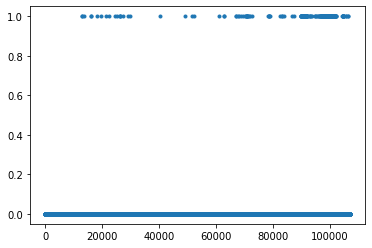

In [40]:
plt.plot( np.isnan(raw_data.n_field_counters), ".")

#### less important, but lets look at temp
looks like people have been violating audubon specifications, regardless of unit

In [112]:
raw_counts.min_temp.str.contains(".", regex=False).sum()

328

In [120]:
raw_data.loc[raw_counts.min_temp.str.contains(".", regex=False), ("count_year", "min_temp", "temp_unit")]

,count_year,min_temp,temp_unit
60908,1997,27.5,2.0
89673,2011,8.5,2.0
89736,2012,-6.4,1.0
89753,2012,1.6,1.0
89767,2012,-2.5,1.0
...,...,...,...
106726,2018,-9.5,2.0
106838,2018,19.8,2.0
106840,2018,30.7,2.0
106879,2018,11.4,2.0


In [113]:
raw_counts.max_temp.str.contains(".", regex=False).sum()

329

In [121]:
raw_data.loc[raw_counts.max_temp.str.contains(".", regex=False), ("count_year", "max_temp", "temp_unit")]

,count_year,max_temp,temp_unit
68356,2001,35.5,2.0
70332,2002,41.5,2.0
81177,2008,2.5,1.0
89736,2012,-3.8,1.0
89753,2012,2.8,1.0
...,...,...,...
106647,2018,29.9,2.0
106726,2018,9.3,2.0
106838,2018,26.1,2.0
106879,2018,26.6,2.0


are they coincident?

In [125]:
sum(raw_counts.max_temp.str.contains(".", regex=False) & raw_counts.min_temp.str.contains(".", regex=False))

241

### why are `*_cloud` `float`s but not `*_rain` and `*_snow`?

## the NaNs

### n_feeder_counters

In [100]:
sum(np.isnan(raw_data.n_feeder_counters)) / len(raw_data) * 100

52.699454778404366

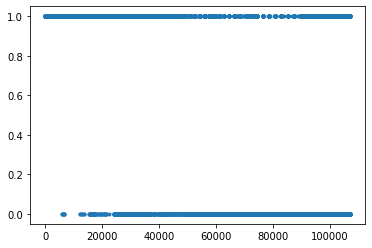

In [96]:
plt.plot( np.isnan(raw_data.n_feeder_counters), ".")

### min_field_parties

In [102]:
sum(np.isnan(raw_data.min_field_parties)) / len(raw_data) * 100

47.429602820563176

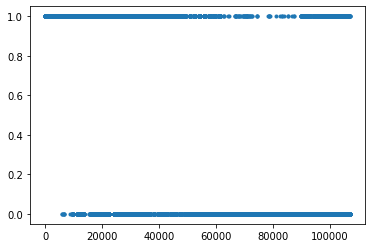

In [103]:
plt.plot( np.isnan(raw_data.min_field_parties), ".")

### max_field_parties

In [105]:
sum(np.isnan(raw_data.max_field_parties)) / len(raw_data) * 100

46.603821227169426

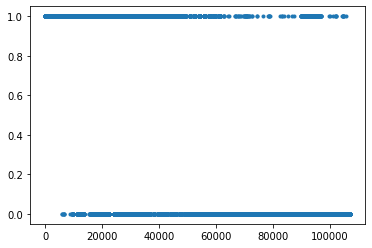

In [106]:
plt.plot( np.isnan(raw_data.max_field_parties), ".")

celcius wasnt discoverd until the 1990's, apparently 

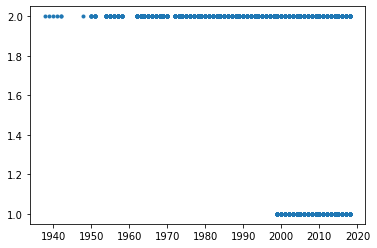

In [13]:
plt.plot(raw_data.count_year, raw_data.temp_unit, "." )

In [25]:
np.sum( np.isnan(raw_data.temp_unit)) / len(raw_data)

0.4666647962666816

In [28]:
np.sum( raw_data.temp_unit == 1) / len(raw_data)

0.062144039502847685

In [16]:
sum( raw_data.temp_unit == np.nan )

0

In [34]:
np.unique( raw_data.am_rain )

TypeError: '<' not supported between instances of 'str' and 'float'